In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TRAINING

In [ ]:
df = pd.read_csv('/content/finalday31.csv')
df['loggingTime(txt)'] = df['loggingTime(txt)']
df.set_index('loggingTime(txt)', inplace=True)
print(df.index[:5])

Index(['2023-10-12T00:07:51.978+05:30', '2023-10-12T00:07:52.077+05:30',
       '2023-10-12T00:07:52.177+05:30', '2023-10-12T00:07:52.281+05:30',
       '2023-10-12T00:07:52.377+05:30'],
      dtype='object', name='loggingTime(txt)')


In [ ]:
# columns_to_keep = ['accelerometerAccelerationX(G)']
# df = df.loc[:, columns_to_keep]
# df.head()
# Load data for X, Y, and Z axes into a single DataFrame
data = df[['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)','gyroRotationX(rad/s)','gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)','motionRoll(rad)','motionPitch(rad)','motionYaw(rad)']]
data.head()

,accelerometerAccelerationX(G),accelerometerAccelerationY(G),accelerometerAccelerationZ(G),gyroRotationX(rad/s),gyroRotationY(rad/s),gyroRotationZ(rad/s),motionRoll(rad),motionPitch(rad),motionYaw(rad)
loggingTime(txt),,,,,,,,,
2023-10-12T00:07:51.978+05:30,0.073547,-0.754349,-0.680679,-0.095626,-0.069870,-0.208645,0.232572,0.672211,-2.121884
2023-10-12T00:07:52.077+05:30,0.098328,-0.685608,-0.718063,-0.095626,-0.069870,-0.208645,0.236336,0.670144,-2.150655
2023-10-12T00:07:52.177+05:30,0.093521,-0.726151,-0.677368,0.018918,-0.480116,-0.256138,0.226677,0.659018,-2.177544
2023-10-12T00:07:52.281+05:30,0.068222,-0.685242,-0.738159,-0.171050,-0.396430,-0.231705,0.209379,0.675317,-2.217084
2023-10-12T00:07:52.377+05:30,0.054459,-0.690536,-0.790619,0.035752,-0.689746,-0.085329,0.191510,0.662176,-2.248481


In [ ]:
len(data)

11639

In [ ]:
def df_to_X_y(df, window_size=2):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        window_data = df_as_np[i:i + window_size]
        X.append(window_data)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 2
X1, y1 = df_to_X_y(data, WINDOW_SIZE)
print(X1.shape, y1.shape)

(11637, 2, 9) (11637, 9)


In [ ]:
print(f'Given the Array: \n{X1[0].flatten()}')
print(f'Predict this y: \n {y1[0]}')

Given the Array: 
[ 0.07354736 -0.75434875 -0.68067932 -0.09562586 -0.06986963 -0.20864536
  0.23257235  0.6722108  -2.12188381  0.09832764 -0.68560791 -0.71806335
 -0.09562586 -0.06986963 -0.20864536  0.23633575  0.67014412 -2.15065502]
Predict this y: 
 [ 0.09352112 -0.72615051 -0.67736816  0.01891803 -0.48011574 -0.25613776
  0.22667693  0.65901752 -2.17754352]


In [ ]:
# Split the data
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
total_samples = len(X1)
train_samples = int(0.7 * total_samples)
val_samples = int(0.15 * total_samples)
test_samples = total_samples - train_samples - val_samples

# Split the data into train, validation, and test sets
X_train, y_train = X1[:train_samples], y1[:train_samples]
X_val, y_val = X1[train_samples:train_samples + val_samples], y1[train_samples:train_samples + val_samples]
X_test, y_test = X1[train_samples + val_samples:], y1[train_samples + val_samples:]

# Reshape X_train before normalization
# Reshape and normalize X_train
# scaler_X = MinMaxScaler()
# samples, window_size, features = X_train.shape
# X_train_reshaped = X_train.reshape(samples, -1)  # Reshape to (number_of_samples, WINDOW_SIZE * 9)
# X_train_normalized = scaler_X.fit_transform(X_train_reshaped).reshape(samples, window_size, features)  # Reshape back to (number_of_samples, WINDOW_SIZE, 9)

# # Similarly, reshape and normalize X_val and X_test
# X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
# X_val_normalized = scaler_X.transform(X_val_reshaped).reshape(X_val.shape[0], window_size, features)

# X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
# X_test_normalized = scaler_X.transform(X_test_reshaped).reshape(X_test.shape[0], window_size, features)



# # Normalize output labels
# scaler_y = MinMaxScaler()
# y_train_normalized = scaler_y.fit_transform(y_train)
# y_val_normalized = scaler_y.transform(y_val)
# y_test_normalized = scaler_y.transform(y_test)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

# DATA SCALING

In [ ]:
# Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
# Reshape the input data for MLPRegressor
X_train_2d = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_val_2d = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
X_test_2d = X_test_scaled.reshape(X_test_scaled.shape[0], -1)


In [ ]:
print(len(X_train_2d))
print(len(y_train))

8145
8145


In [ ]:
# Define the MLPRegressor with additional hyperparameters
model_nn = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),  # Number of neurons in each hidden layer
    #hidden_layer_sizes=(20,20),
    activation='relu',  # Activation function
    solver='adam',  # Optimization algorithm
    alpha=0.0001,  # L2 regularization term
    learning_rate='constant',  # Learning rate schedule
    learning_rate_init=0.001,  # Initial learning rate
    batch_size='auto',  # Size of minibatches for stochastic optimizers
    shuffle=False,  # Whether to shuffle training data
    early_stopping=False,  # Enable early stopping
    validation_fraction=0.1,  # Fraction of training data to set aside for validation
    beta_1=0.9,  # Exponential decay rate for estimates of the first moment vector in adam
    beta_2=0.999,  # Exponential decay rate for estimates of the second moment vector in adam
    epsilon=1e-08,  # Value for numerical stability in adam
    max_iter=500,  # Maximum number of iterations
    random_state=42
)
# The above line sets up a neural network with three hidden layers having 100, 50, and 25 neurons, respectively.

# Increased number of trees in Random Forest Regressor
model_rf = RandomForestRegressor(
    n_estimators=200,  # Number of trees in the forest
    criterion='squared_error',  # Function to measure the quality of a split
    max_depth=5,  # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,  # Minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
    max_features='auto',  # Number of features to consider for the best split
    max_leaf_nodes=None,  # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    bootstrap=True,  # Whether bootstrap samples are used when building trees
    oob_score=False,  # Whether to use out-of-bag samples to estimate the generalization accuracy
    n_jobs=None,  # The number of jobs to run in parallel for both fit and predict
    random_state=42,
    verbose=0,
    warm_start=False,  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
    ccp_alpha=0.0,  # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None  # If bootstrap is True, the number of samples to draw from X to train each base estimator
)
# The above line sets up a random forest with 200 decision trees.


In [ ]:
import numpy as np

# Assuming X_train_2d and y_train are your NumPy arrays
# Check for missing values in X_train_2d
missing_values_x = np.isnan(X_train_2d)
num_missing_x = np.sum(missing_values_x)

# Check for missing values in y_train
missing_values_y = np.isnan(y_train)
num_missing_y = np.sum(missing_values_y)

print("Number of missing values in X_train_2d:", num_missing_x)
print("Number of missing values in y_train:", num_missing_y)


Number of missing values in X_train_2d: 0
Number of missing values in y_train: 0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming X_train_2d and y_train are your NumPy arrays
# Convert them to Pandas DataFrames
X_train_df = pd.DataFrame(X_train_2d)
y_train_df = pd.DataFrame(y_train)

# Use dropna on Pandas DataFrames
X_train_df_clean = X_train_df.dropna()
y_train_clean = y_train_df.loc[X_train_df_clean.index]

# Convert back to NumPy arrays if needed
X_train_2d = X_train_df_clean.values
y_train = y_train_clean.values

# Now X_train_2d_clean and y_train_clean have no missing values




In [ ]:
print("X_train_2d shape:", X_train_2d.shape)
print("y_train shape:", y_train.shape)
print("X_val_2d shape:", X_val_2d.shape)
print("y_val shape:", y_val.shape)


X_train_2d shape: (8145, 18)
y_train shape: (8145, 9)
X_val_2d shape: (1745, 18)
y_val shape: (1745, 9)


In [ ]:
ensemble_model = MultiOutputRegressor(estimator=VotingRegressor([('nn', model_nn), ('rf', model_rf)]))

# Fitting
ensemble_model.fit(X_train_2d, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

MultiOutputRegressor(estimator=VotingRegressor(estimators=[('nn',
                                                            MLPRegressor(hidden_layer_sizes=(100,
                                                                                             50,
                                                                                             25),
                                                                         max_iter=500,
                                                                         random_state=42,
                                                                         shuffle=False)),
                                                           ('rf',
                                                            RandomForestRegressor(max_depth=5,
                                                                                  max_features='auto',
                                                                                  n_estimators=200,
                                                                                  random_state=42))]))

In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = np.abs(cross_val_score(ensemble_model, X_train_2d, y_train, cv=tscv, scoring='neg_mean_absolute_error'))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

KeyboardInterrupt: 

In [ ]:
# Display cross-validation scores
print("Cross-Validation Scores:")
print(np.abs(cv_scores))
print(f'Mean Cross-Validation Score: {np.abs(np.mean(cv_scores))}')

In [ ]:
WINDOW_SIZE = 8

In [ ]:
y_train.shape

(8145, 9)

In [ ]:
# train_predictions = model1.predict(X_train).flatten()
# train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
# train_results

train_predictions = ensemble_model.predict(X_train_2d)
train_predictions.shape

num_outputs = train_predictions.shape[1]

# Define output labels
output_labels = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)',
                 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)',
                 'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)']

# Visualize each output separately with corresponding labels
for i in range(num_outputs):
    # Create a DataFrame with predicted and actual values for the current output
    output_data = pd.DataFrame(data={'Predicted': train_predictions[:, i][:150], 'Actual': y_train[:, i][:150]})
    output_data ['Residual'] = output_data ['Predicted'] - output_data ['Actual']
    output_data['RMSE'] = np.sqrt(np.square(output_data['Residual']))
    mse = (output_data['Residual'] ** 2).mean()
    rmse = np.sqrt(mse)
    print(output_labels[i],rmse)
    # # Plot predicted and actual values
    # plt.figure(figsize=(8, 4))
    # plt.plot(output_data['Predicted'], label='Predicted')
    # plt.plot(output_data['Actual'], label='Actual')
    # plt.xlabel('Sample Index')
    # plt.ylabel('Value')
    # plt.title(f'{output_labels[i]} Predicted vs Actual')
    # plt.legend()
    # plt.show()

accelerometerAccelerationX(G) 0.07746222025596253
accelerometerAccelerationY(G) 0.06704190995489888
accelerometerAccelerationZ(G) 0.11982409741130977
gyroRotationX(rad/s) 0.20356456196979034
gyroRotationY(rad/s) 0.31011781838904084
gyroRotationZ(rad/s) 0.16362667958596985
motionYaw(rad) 0.03359000559999161
motionRoll(rad) 0.029651119353026945
motionPitch(rad) 0.23714022324462322


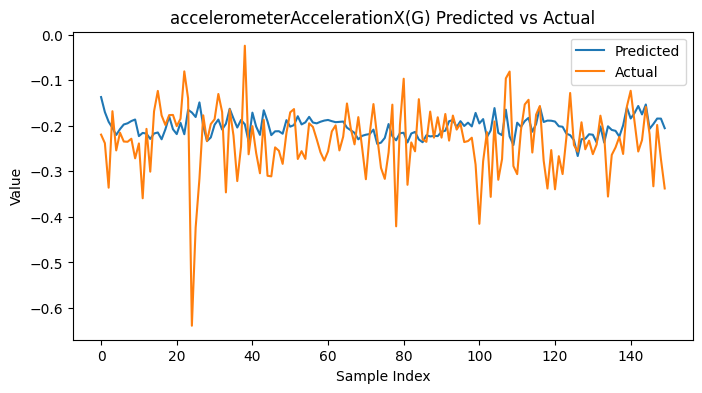

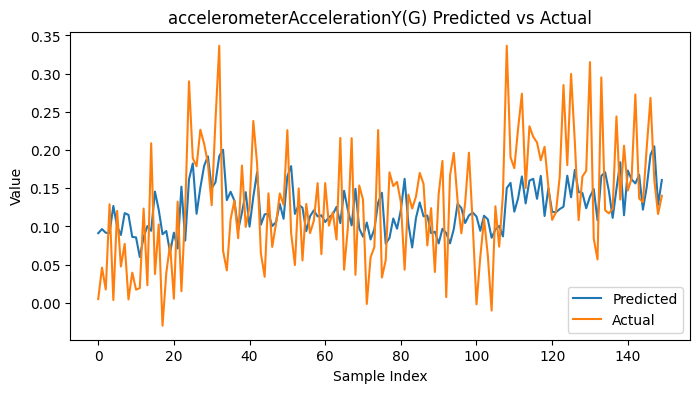

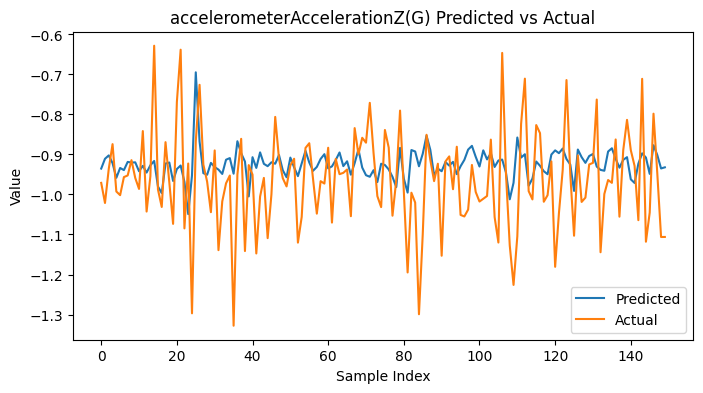

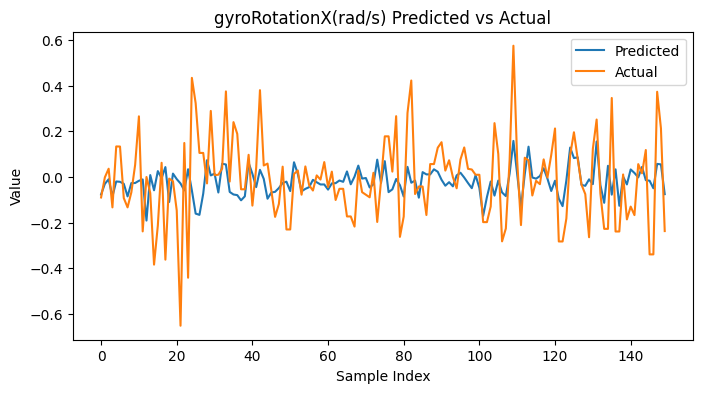

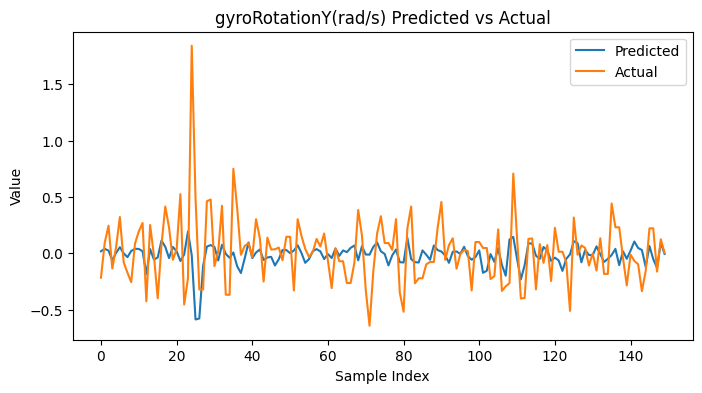

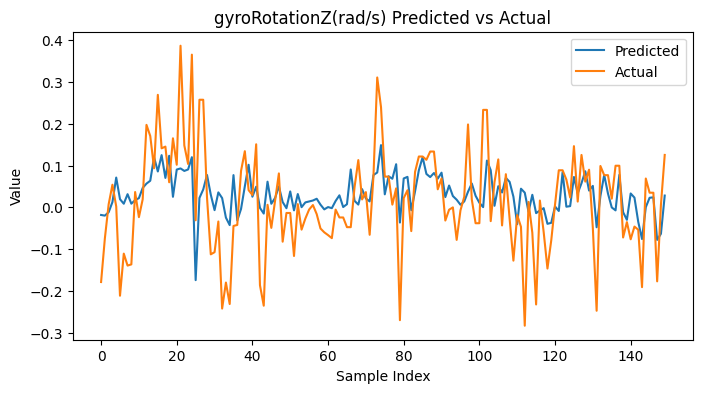

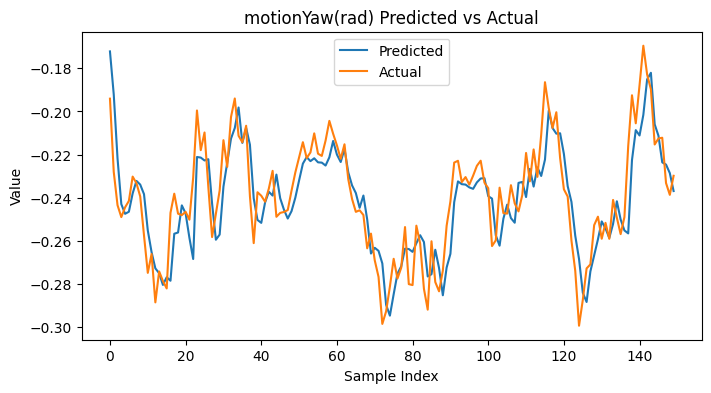

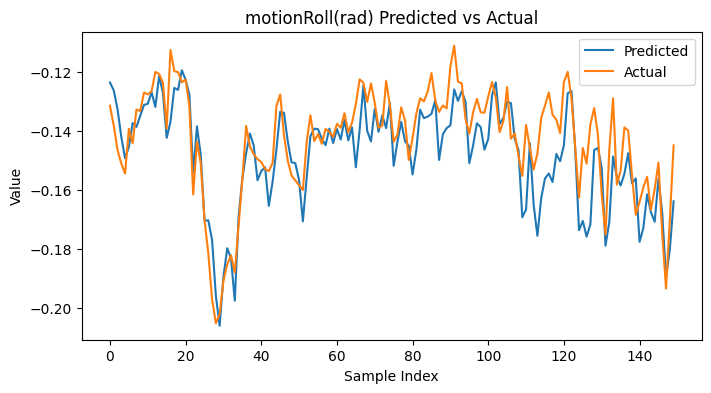

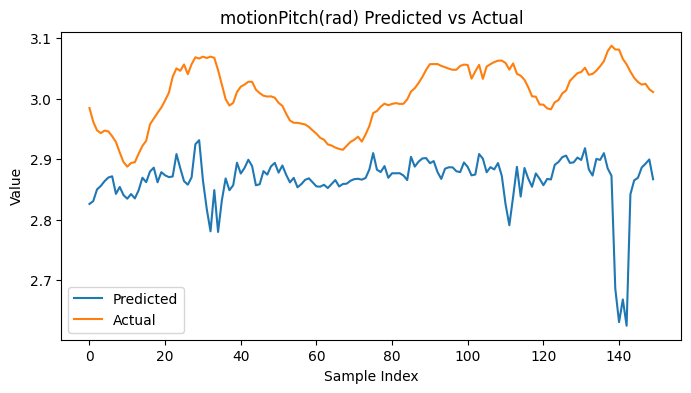

In [ ]:


    test_predictions = ensemble_model.predict(X_test_2d)

    # Iterate over each output column
    for i in range(y_test.shape[1]):
        predicted_column = test_predictions[:, i]
        actual_column = y_test[:, i]

        # Create a DataFrame with predicted and actual values for the current output
        output_data = pd.DataFrame(data={'Predicted': predicted_column.flatten()[:150], 'Actual': actual_column.flatten()[:150]})


        # Plot predicted and actual values
        plt.figure(figsize=(8, 4))
        plt.plot(output_data['Predicted'], label='Predicted')
        plt.plot(output_data['Actual'], label='Actual')
        plt.xlabel('Sample Index')
        plt.ylabel('Value')
        plt.title(f'{output_labels[i]} Predicted vs Actual')
        plt.legend()
        plt.show()


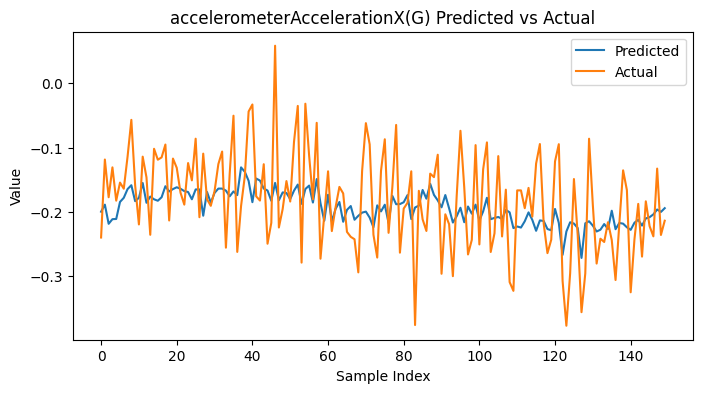

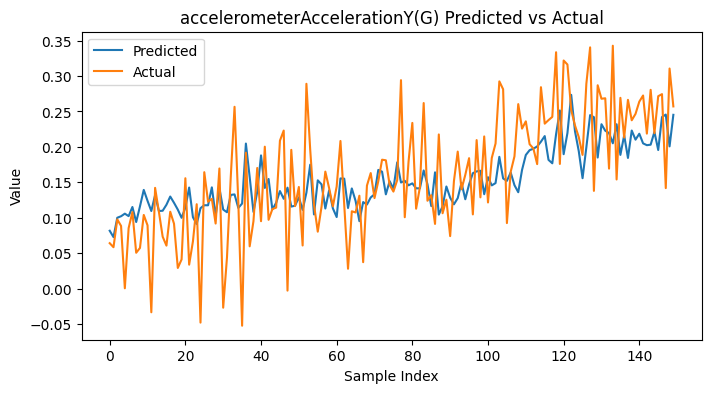

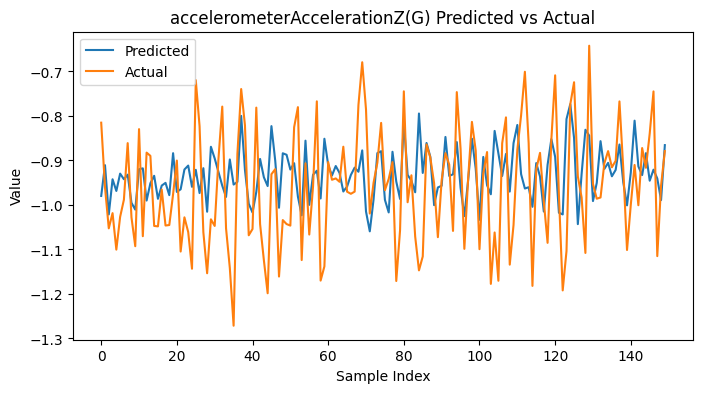

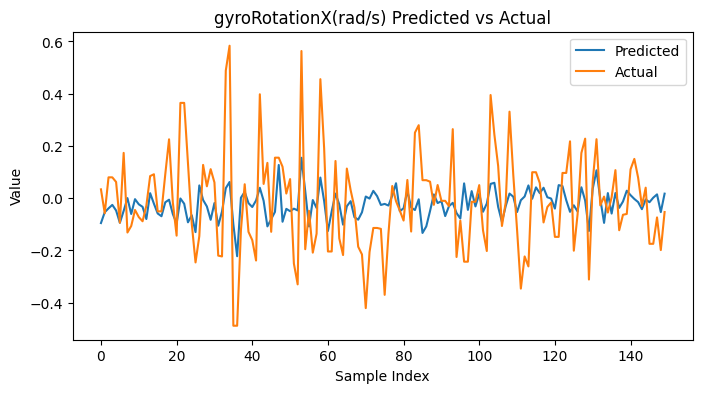

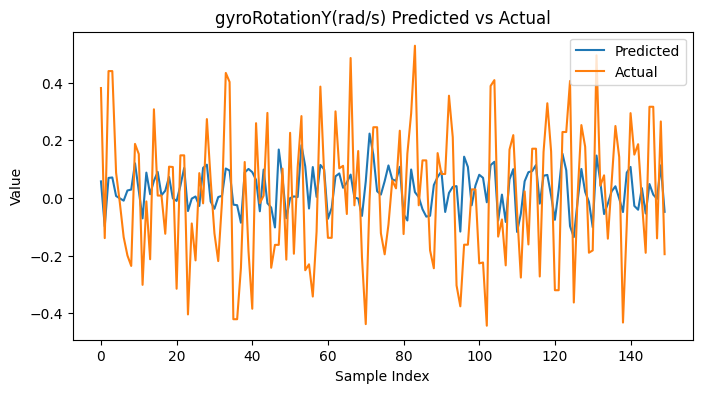

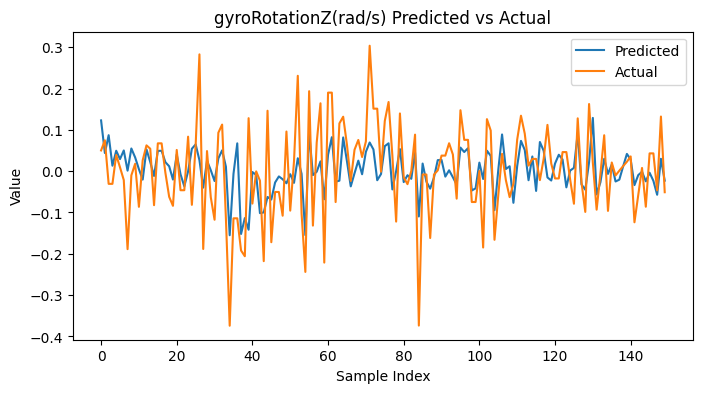

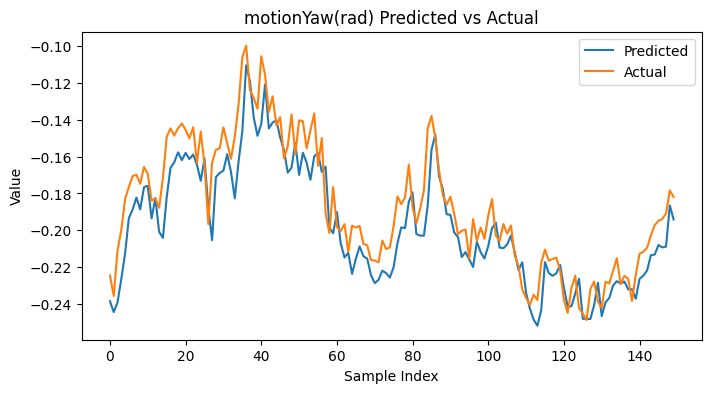

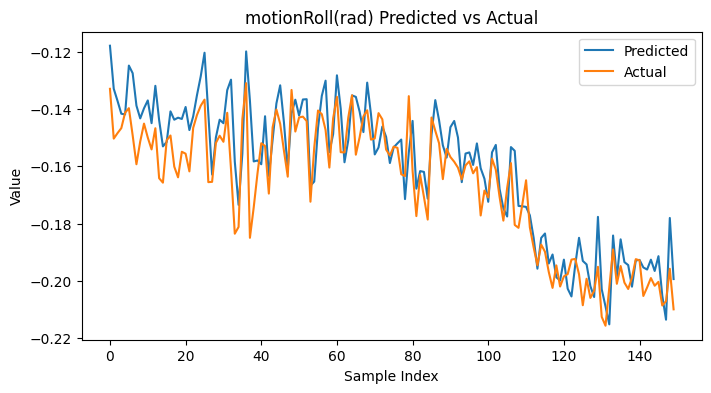

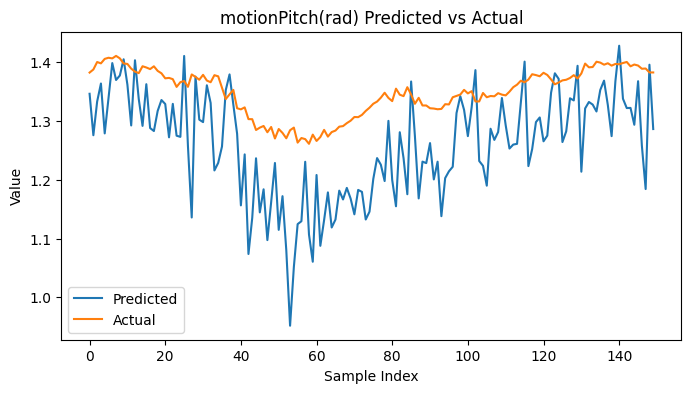

In [ ]:


    val_predictions = ensemble_model.predict(X_val_2d)

    # Iterate over each output column
    for i in range(y_val.shape[1]):
        predicted_column = val_predictions[:, i]
        actual_column = y_val[:, i]

        # Create a DataFrame with predicted and actual values for the current output
        output_data = pd.DataFrame(data={'Predicted': predicted_column.flatten()[:150], 'Actual': actual_column.flatten()[:150]})


        # Plot predicted and actual values
        plt.figure(figsize=(8, 4))
        plt.plot(output_data['Predicted'], label='Predicted')
        plt.plot(output_data['Actual'], label='Actual')
        plt.xlabel('Sample Index')
        plt.ylabel('Value')
        plt.title(f'{output_labels[i]} Predicted vs Actual')
        plt.legend()
        plt.show()


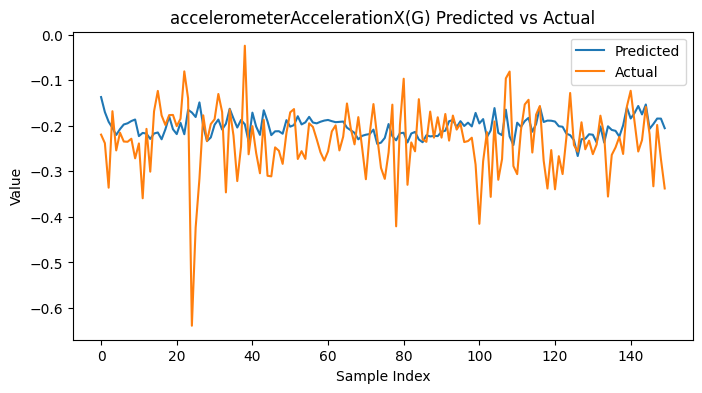

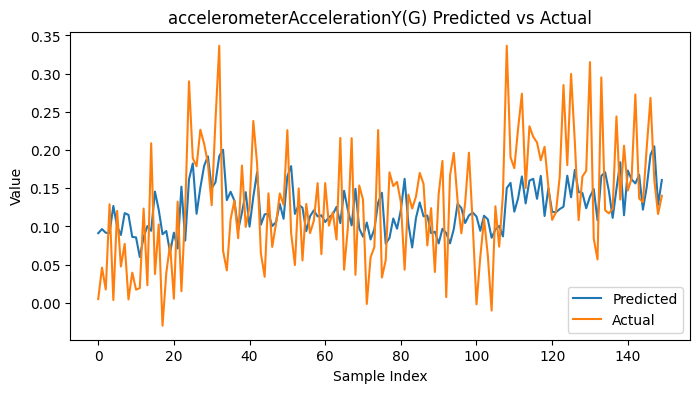

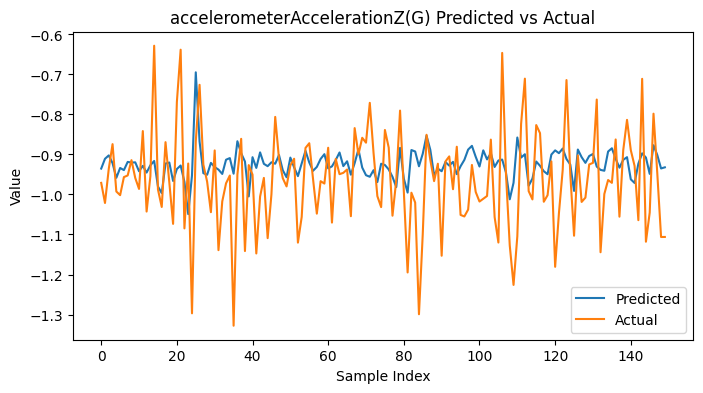

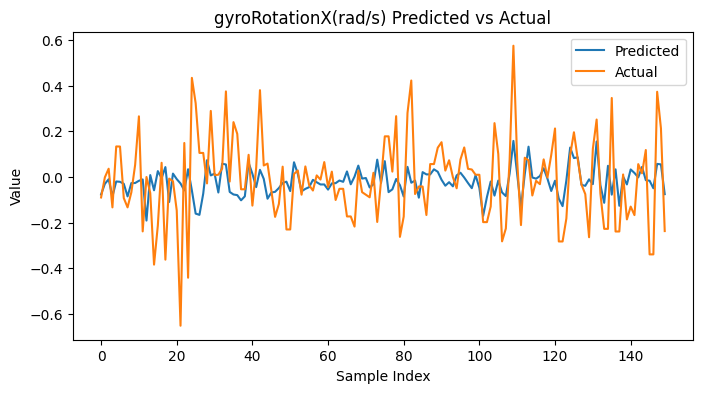

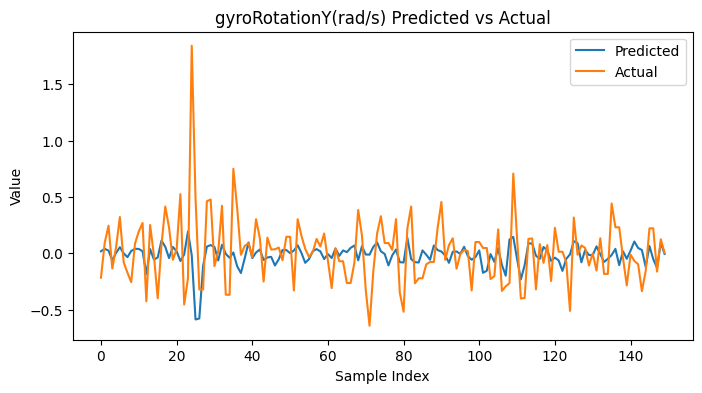

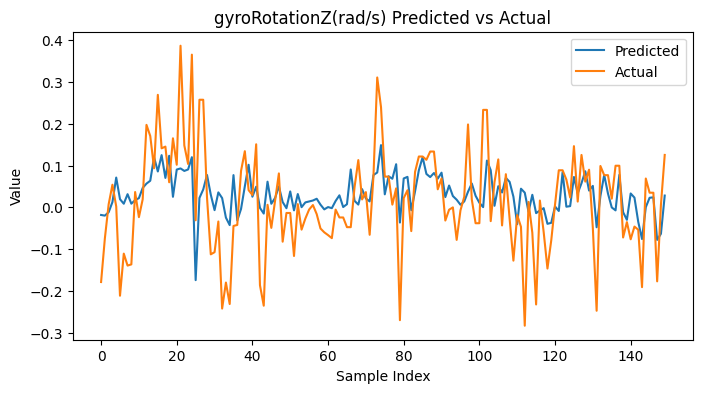

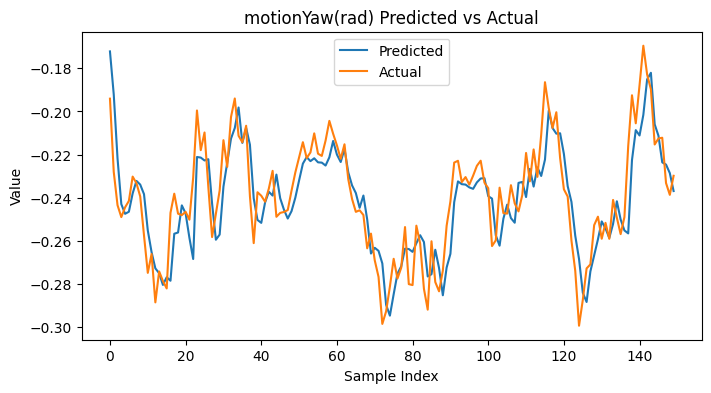

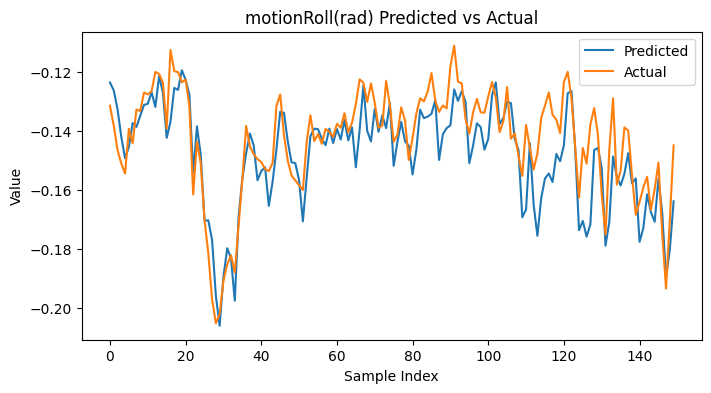

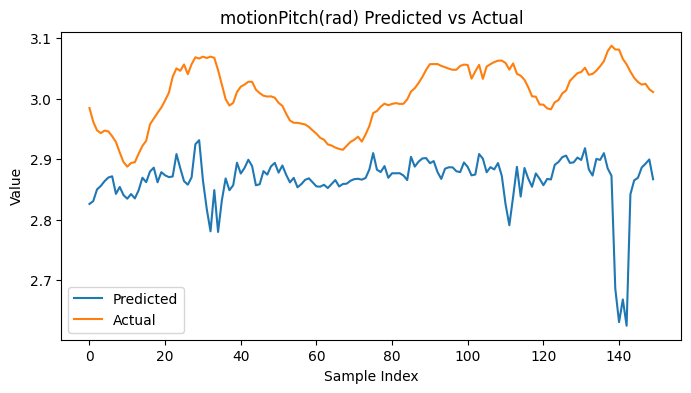

In [ ]:
val_predictions = ensemble_model.predict(X_val_2d)
val_predictions.shape

num_outputs = val_predictions.shape[1]

# Define output labels
output_labels = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)',
                 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)',
                 'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)']

# Visualize each output separately with corresponding labels
for i in range(num_outputs):
    # Create a DataFrame with predicted and actual testues for the current output
    output_data = pd.DataFrame(data={'Predicted': test_predictions[:, i][:150], 'Actual': y_test[:, i][:150]})

    # Plot predicted and actual testues
    plt.figure(figsize=(8, 4))
    plt.plot(output_data['Predicted'], label='Predicted')
    plt.plot(output_data['Actual'], label='Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'{output_labels[i]} Predicted vs Actual')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
# Predictions
test_predictions = ensemble_model.predict(X_test_2d)
train_predictions= ensemble_model.predict(X_train_2d)
val_predictions= ensemble_model.predict(X_val_2d)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, test_predictions)
mae2 = mean_absolute_error(y_train, train_predictions)
mae3 = mean_absolute_error(y_val, val_predictions)
print(f'Mean Absolute Error of test: {mae}')
print(f'Mean Absolute Error of train: {mae2}')
print(f'Mean Absolute Error of val: {mae3}')

Mean Absolute Error of test: 0.14351461087298245
Mean Absolute Error of train: 0.10809881205511035
Mean Absolute Error of val: 0.08559690343766985


In [ ]:
# Test
# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_per_output = mean_absolute_error(y_test, test_predictions, multioutput='raw_values')
overall_mae = np.mean(mae_per_output)
for i, mae in enumerate(mae_per_output):
    print(f'MAE for Output {i+1}: {mae}')
print(f'Overall MAE: {overall_mae}')

# Calculate Mean Squared Error (MSE)
mse_per_output = mean_squared_error(y_test, test_predictions, multioutput='raw_values')
overall_mse = np.mean(mse_per_output)
for i, mse in enumerate(mse_per_output):
    print(f'MSE for Output {i+1}: {mae}')
print(f'Overall MSE: {overall_mse}')

# Calculate Root Mean Squared Error (RMSE) for each output
rmse_per_output = np.sqrt(mse_per_output)
overall_rmse = np.mean(rmse_per_output)
for i, rmse in enumerate(rmse_per_output):
    print(f'RMSE for Output {i+1}: {rmse}')
print(f'Overall RMSE: {rmse}')

MAE for Output 1: 0.06638120090958187
MAE for Output 2: 0.0819692544646397
MAE for Output 3: 0.11982414848640605
MAE for Output 4: 0.1994699199265568
MAE for Output 5: 0.3118782520847898
MAE for Output 6: 0.13651393195451406
MAE for Output 7: 0.018760902062693426
MAE for Output 8: 0.014088832333611183
MAE for Output 9: 0.34274505563404917
Overall MAE: 0.14351461087298245
MSE for Output 1: 0.34274505563404917
MSE for Output 2: 0.34274505563404917
MSE for Output 3: 0.34274505563404917
MSE for Output 4: 0.34274505563404917
MSE for Output 5: 0.34274505563404917
MSE for Output 6: 0.34274505563404917
MSE for Output 7: 0.34274505563404917
MSE for Output 8: 0.34274505563404917
MSE for Output 9: 0.34274505563404917
Overall MSE: 0.06905220713672763
RMSE for Output 1: 0.09344143304244214
RMSE for Output 2: 0.1184431185538305
RMSE for Output 3: 0.1676998258279596
RMSE for Output 4: 0.2987819559041198
RMSE for Output 5: 0.4881364396736048
RMSE for Output 6: 0.2063451915093041
RMSE for Output 7: 0.0

# TESTING

**bold text**#TESTING


In [ ]:
df1 = pd.read_csv('/content/modified_latest_finalday32.csv')
# df1['Timestamp'] = df1['Timestamp']
# df1.set_index('Timestamp', inplace=True)
# print(df1.index[:5])

In [ ]:
data = df1[['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)','gyroRotationX(rad/s)','gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)','motionRoll(rad)','motionYaw(rad)','motionPitch(rad)']]
data.head()

,accelerometerAccelerationX(G),accelerometerAccelerationY(G),accelerometerAccelerationZ(G),gyroRotationX(rad/s),gyroRotationY(rad/s),gyroRotationZ(rad/s),motionRoll(rad),motionYaw(rad),motionPitch(rad)
0,-0.062164,0.087219,-1.028366,0.016439,0.341306,-0.025112,-0.098617,1.264676,-0.171408
1,0.010422,0.071045,-1.010254,-0.004868,-0.057749,-0.063348,-0.089733,1.264410,-0.163690
2,-0.133179,0.120468,-0.940887,0.028345,0.091572,-0.209158,-0.071438,1.263523,-0.162966
3,-0.051407,0.095810,-1.033401,0.018712,0.173653,-0.310739,-0.074949,1.250737,-0.161519
4,-0.040253,0.073471,-0.996536,0.018712,0.173653,-0.310739,-0.072336,1.227406,-0.153861


In [ ]:
WINDOW_SIZE = 2
X2, y2 = df_to_X_y(data, WINDOW_SIZE)

In [ ]:
# Scaling features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X2.reshape(-1, X2.shape[-1])).reshape(X2.shape)

In [ ]:

X_2d = X_scaled.reshape(X_scaled.shape[0], -1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming X_train_2d and y_train are your NumPy arrays
# Convert them to Pandas DataFrames
X_train_df = pd.DataFrame(X_2d)
y_train_df = pd.DataFrame(y2)

# Use dropna on Pandas DataFrames
X_train_df_clean = X_train_df.dropna()
y_train_clean = y_train_df.loc[X_train_df_clean.index]

# Convert back to NumPy arrays if needed
X_2d = X_train_df_clean.values
y2 = y_train_clean.values

# Now X_train_2d_clean and y_train_clean have no missing values


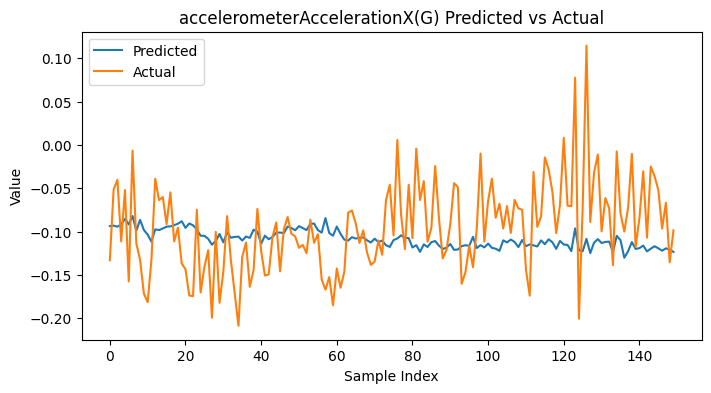

0.13024328281477507


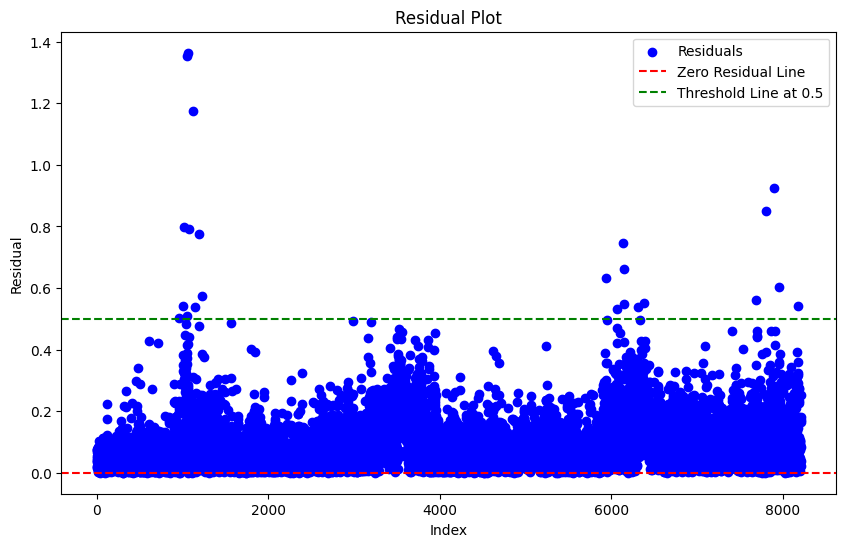

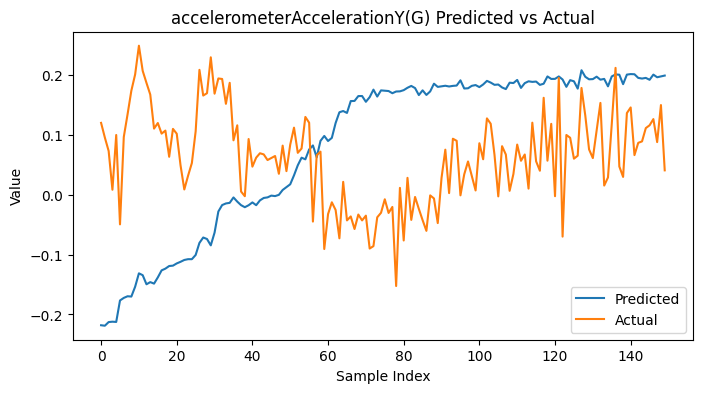

0.3205337552571422


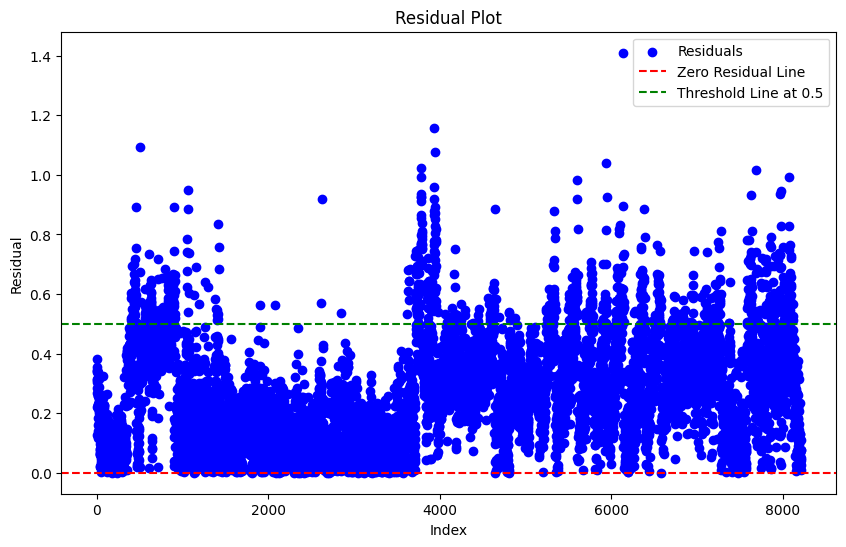

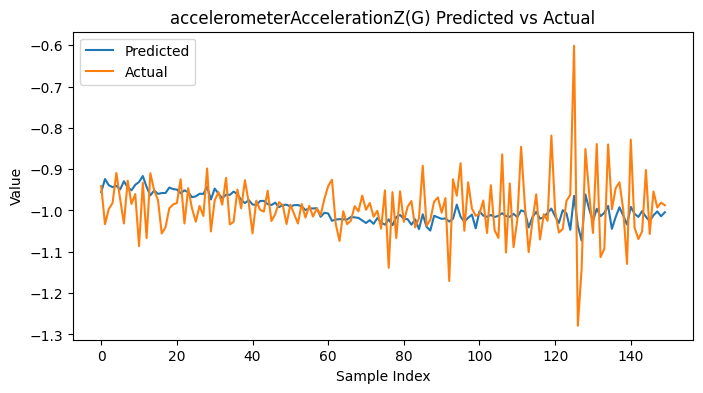

0.19368348878658


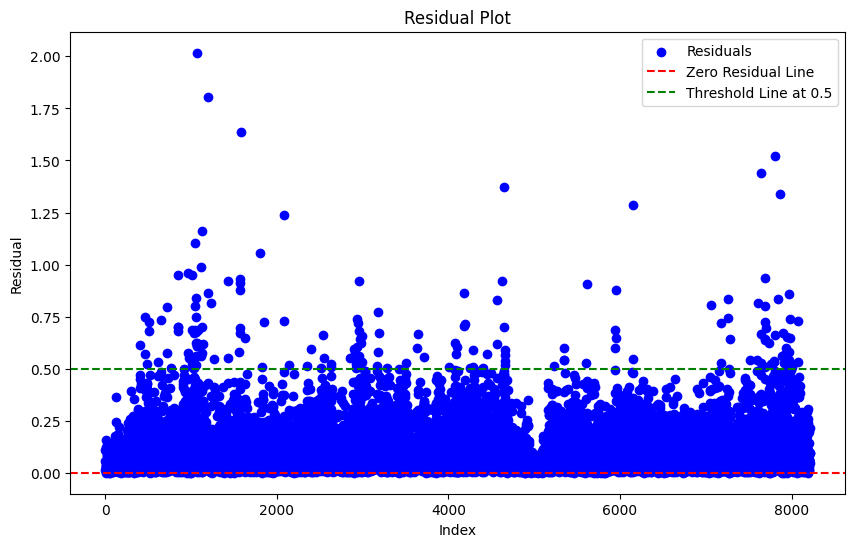

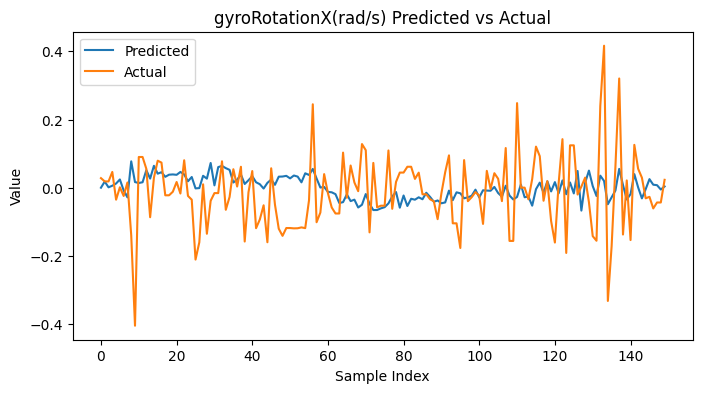

0.3844015002807182


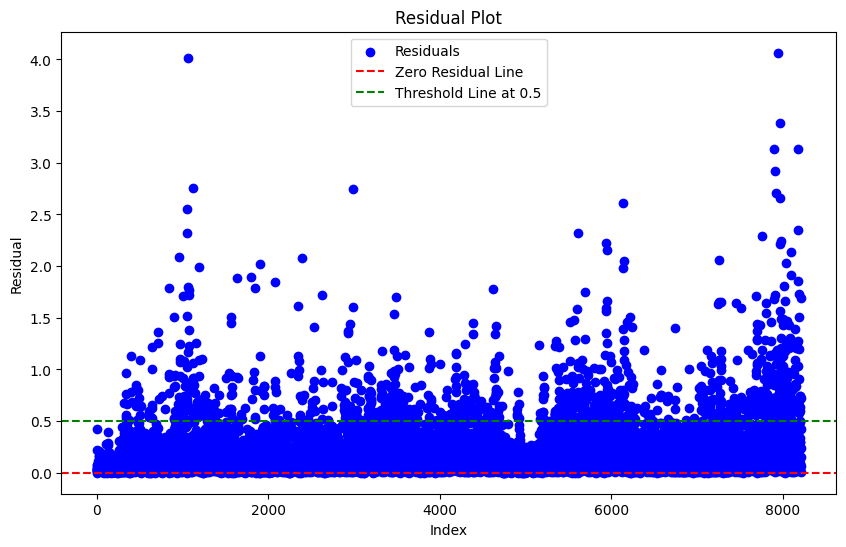

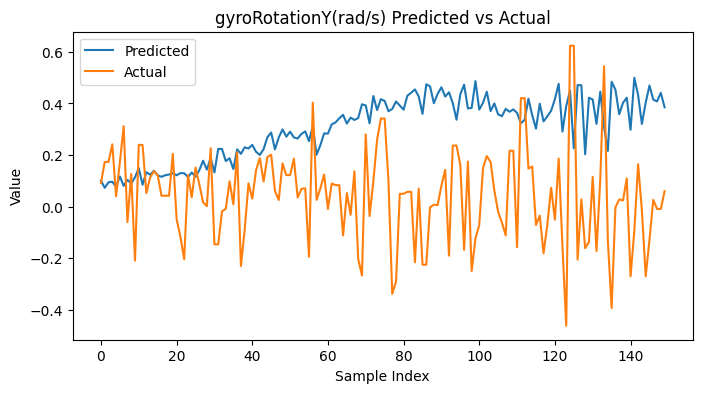

0.4937402237711409


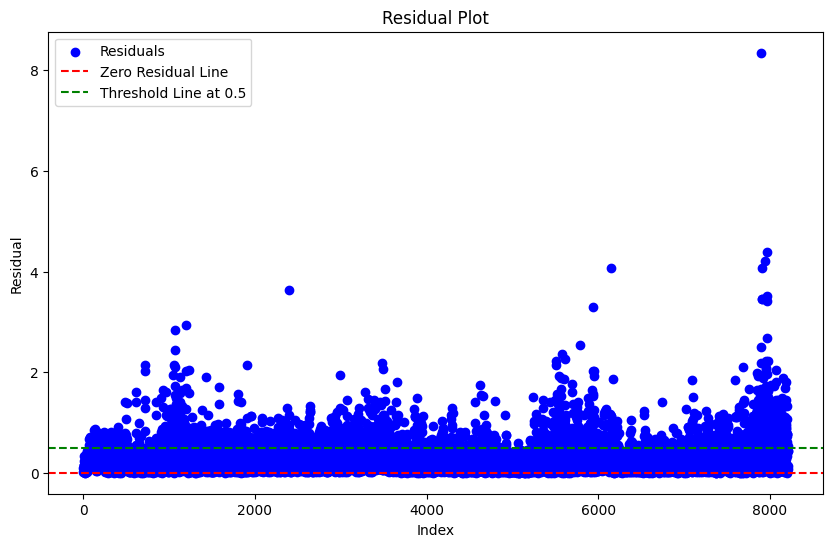

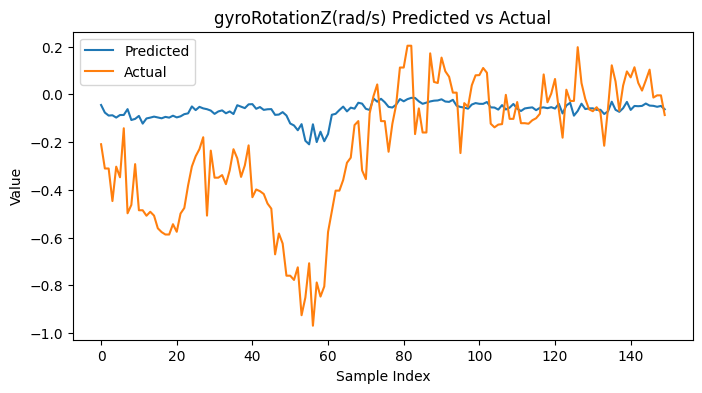

0.21765891272361274


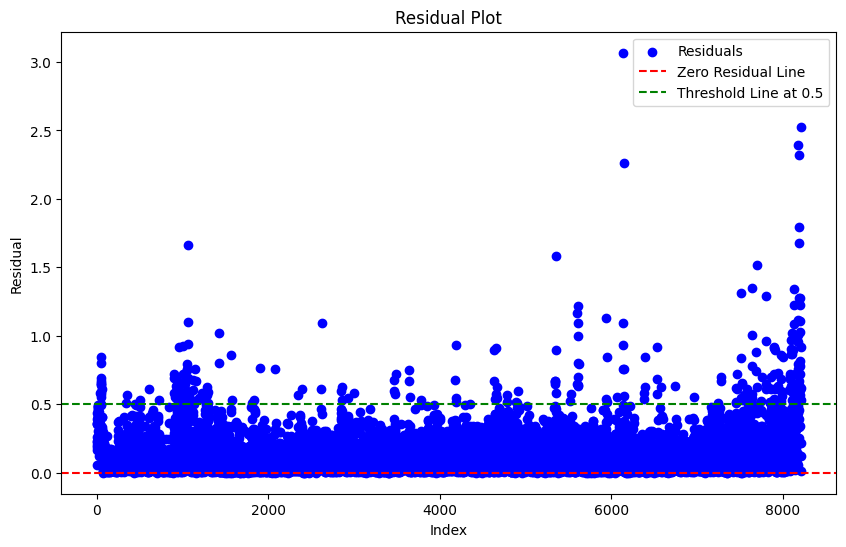

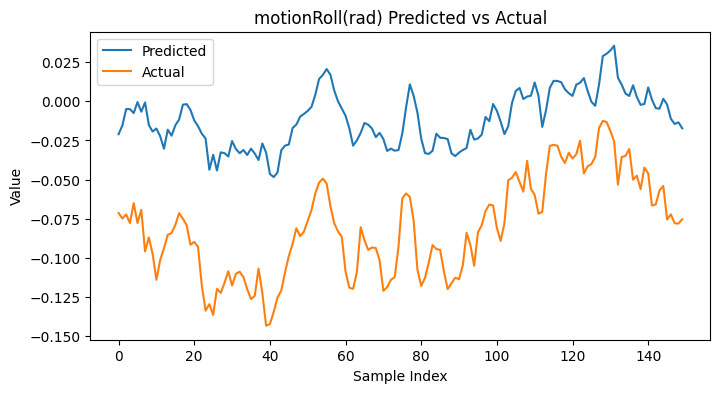

0.11153202957468777


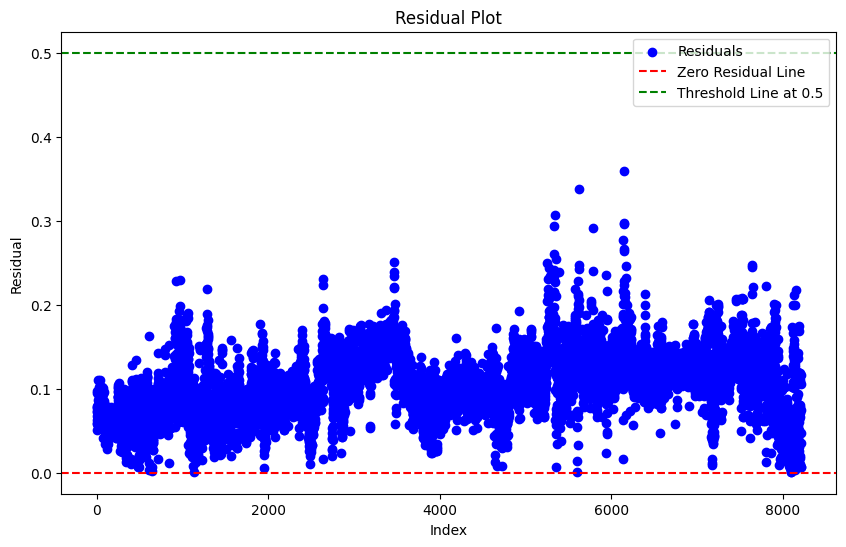

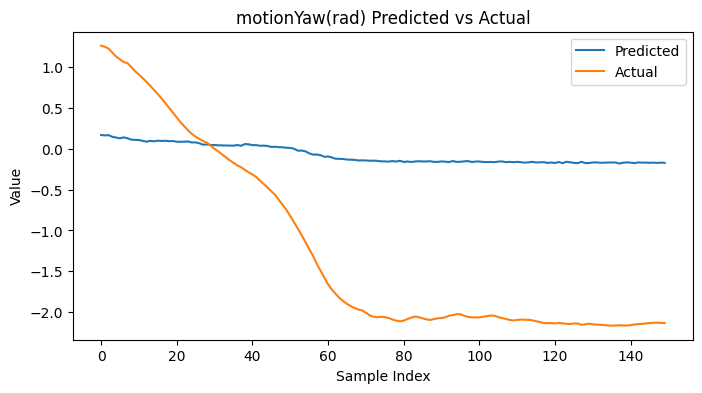

1.654934885013942


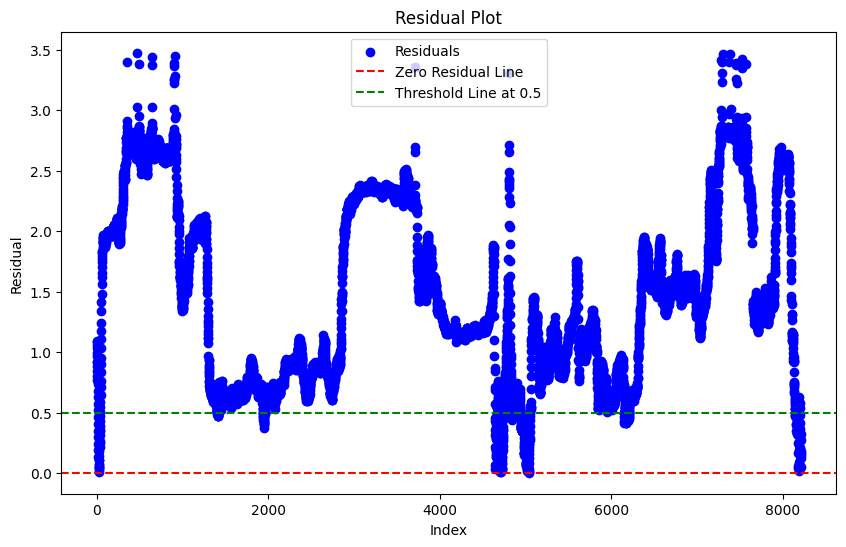

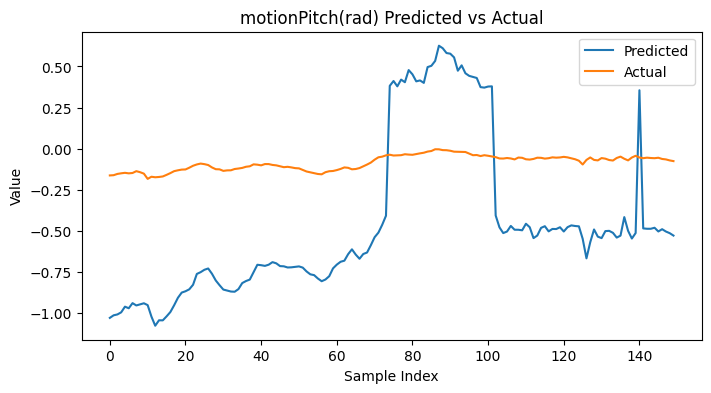

0.8256558300732734


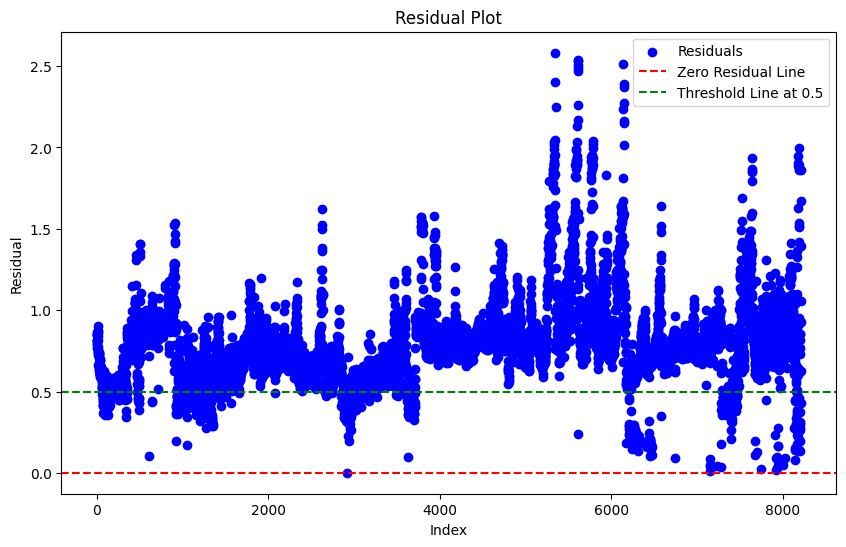

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you already have X2 and y2 defined
test_predictions = ensemble_model.predict(X_2d)
# Define output labels
output_labels = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)',
                 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)',
                'motionRoll(rad)', 'motionYaw(rad)','motionPitch(rad)']
for i in range(len(output_labels)):
    # Select the column corresponding to the current output from test_predictions
    predicted_column = test_predictions[:, i]

    # Select the column corresponding to the current output from y2
    actual_column = y2[:, i]

    # Create a DataFrame with predicted and actual values for the current output
    output_data = pd.DataFrame(data={'Predicted': predicted_column.flatten(), 'Actual': actual_column.flatten()})

    # Plot predicted and actual values
    plt.figure(figsize=(8, 4))
    plt.plot(output_data['Predicted'][:150], label='Predicted')
    plt.plot(output_data['Actual'][:150], label='Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'{output_labels[i]} Predicted vs Actual')
    plt.legend()
    plt.show()
    output_data['Residual'] = output_data['Predicted'] - output_data['Actual']
    output_data['RMSE'] = np.sqrt(np.square(output_data['Residual']))
    mse = (output_data['Residual'] ** 2).mean()
    rmse = np.sqrt(mse)
    print(rmse)

    plt.figure(figsize=(10, 6))
    plt.scatter(output_data.index, output_data['RMSE'], color='blue', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.axhline(y=0.5, color='green', linestyle='--', label='Threshold Line at 0.5')  # Threshold line at 0.5
    plt.xlabel('Index')
    plt.ylabel('Residual')
    plt.title('Residual Plot')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you already have X2 and y2 defined
test_predictions = ensemble_model.predict(X_2d)

for i in range(y2.shape[1]):
    # Select the column corresponding to the current output from test_predictions
    predicted_column = test_predictions[:, i]

    # Select the column corresponding to the current output from y2
    actual_column = y2[:, i]

    # Create a DataFrame with predicted and actual values for the current output
    output_data = pd.DataFrame(data={'Predicted': predicted_column.flatten(), 'Actual': actual_column.flatten()})

    output_data['Residual'] = output_data['Predicted'] - output_data['Actual']
    output_data['RMSE'] = np.sqrt(np.square(output_data['Residual']))
    mse = (output_data['Residual'] ** 2).mean()
    rmse = np.sqrt(mse)
    print(rmse)



0.13024328281477507
0.3205337552571422
0.19368348878658
0.3844015002807182
0.4937402237711409
0.21765891272361274
0.11153202957468777
1.654934885013942
0.8256558300732734


In [ ]:
y2.shape

(8213, 9)

In [ ]:
test_predictions.shape

(8213, 9)

In [ ]:
test_predictions

array([[-0.09373969, -0.2179934 , -0.9555479 , ..., -0.02101408,
         0.16978875, -1.02947231],
       [-0.09315498, -0.21877981, -0.92413043, ..., -0.01543067,
         0.16474702, -1.01391356],
       [-0.09442144, -0.21266642, -0.93889074, ..., -0.00495525,
         0.16793117, -1.00859644],
       ...,
       [-0.08906498, -0.07711818, -0.9833329 , ..., -0.02691738,
         0.09268305,  1.82761583],
       [-0.08539781, -0.10498783, -0.96695272, ...,  0.00398833,
         0.11219963,  1.50284684],
       [-0.08680335, -0.08740635, -0.93323162, ...,  0.02915674,
         0.10978929,  1.02966692]])

In [ ]:
# import numpy as np

# residual_values = np.zeros((y2.shape[0],))

# for i in range(y2.shape[0]):
#     vector_magnitude_test_predictions = np.linalg.norm(test_predictions[i, :])
#     vector_magnitude_y_test = np.linalg.norm(y2[i, :])

#     residual_values[i] = vector_magnitude_test_predictions - vector_magnitude_y_test

# print(residual_values)
import numpy as np

residual_values = np.zeros((y2.shape[0],))

import numpy as np

# Indices of the components to exclude
exclude_indices = [6, 7, 8]  # Assuming motionRoll, motionPitch, and motionYaw indices

residual_values = np.zeros((y2.shape[0],))

for i in range(y2.shape[0]):
    # Exclude specified components from test_predictions
    vector_magnitude_test_predictions = np.linalg.norm(np.delete(test_predictions[i, :], exclude_indices))

    vector_magnitude_y_test = np.linalg.norm(y2[i, :])

    residual_values[i] = vector_magnitude_test_predictions - vector_magnitude_y_test

print(residual_values)



[-0.621317   -0.71390334 -0.65575541 ... -0.166614   -0.64135522
 -0.39959632]


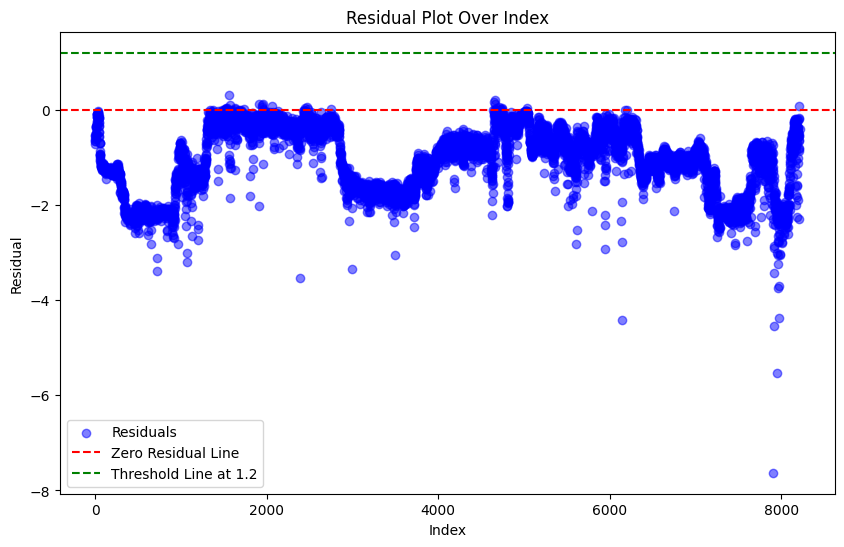

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot of residuals against index
plt.scatter(np.arange(len(residual_values)), residual_values, color='blue', label='Residuals', alpha=0.5)

# Horizontal lines
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.axhline(y=1.2, color='green', linestyle='--', label='Threshold Line at 1.2')

# Labels and title
plt.xlabel('Index')
plt.ylabel('Residual')
plt.title('Residual Plot Over Index')

# Legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
len(residual_values)

8213

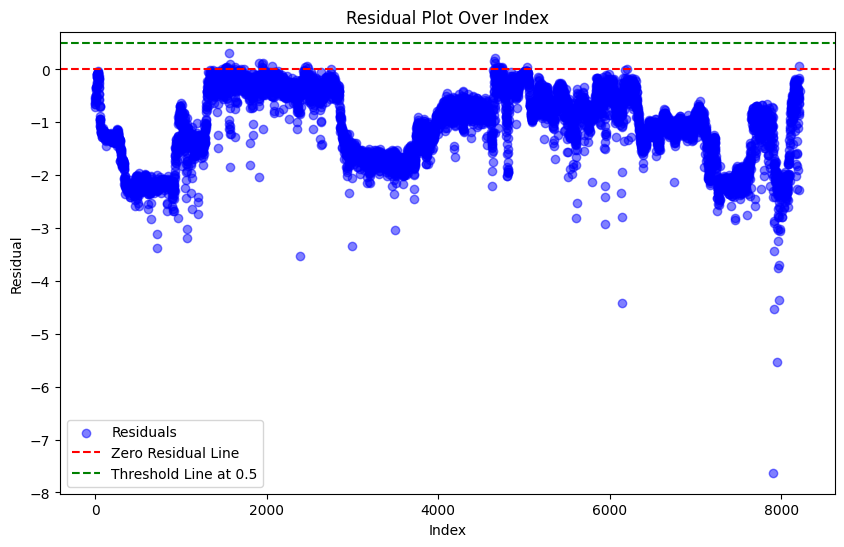

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot of residuals against index
plt.scatter(np.arange(len(residual_values)), residual_values, color='blue', label='Residuals', alpha=0.5)

# Horizontal lines
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.axhline(y=0.5, color='green', linestyle='--', label='Threshold Line at 0.5')

# Labels and title
plt.xlabel('Index')
plt.ylabel('Residual')
plt.title('Residual Plot Over Index')

# Legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
absolute_residual_values = np.abs(residual_values)

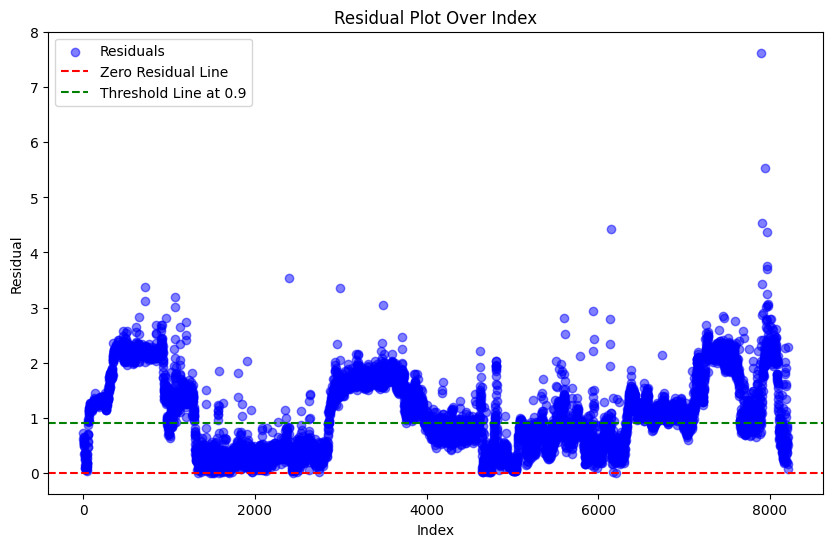

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot of residuals against index for the first 8300 rows
plt.scatter(np.arange(8212), absolute_residual_values[:8212], color='blue', label='Residuals', alpha=0.5)

# Horizontal lines
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.axhline(y=0.9, color='green', linestyle='--', label='Threshold Line at 0.9')

# Labels and title
plt.xlabel('Index')
plt.ylabel('Residual')
plt.title('Residual Plot Over Index')

# Legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y2, test_predictions)
mae2 = mean_absolute_error(y_train, train_predictions)
print(f'Mean Absolute Error of test: {mae}')
print(f'Mean Absolute Error of train: {mae2}')

Mean Absolute Error of test: 0.40094520017194757
Mean Absolute Error of train: 0.10809881205511035


In [ ]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
absolute_residual_values = np.abs(residual_values)

In [ ]:
print("Cross-Validation Scores:")
print(cv_scores)
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

Cross-Validation Scores:


NameError: name 'cv_scores' is not defined

In [ ]:
# Display cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

In [ ]:
import numpy as np

residual_values = np.zeros((1747,))

for i in range(1747):
    vector_magnitude_test_predictions = np.linalg.norm(test_predictions[i, :])
    vector_magnitude_y_test = np.linalg.norm(y_test[i, :])

    residual_values[i] = vector_magnitude_test_predictions - vector_magnitude_y_test

print(residual_values)

In [ ]:
df1['label(N)'].shape

In [ ]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing the label column and anomaly_indicator
# Plotting the actual anomalies
plt.scatter(df1.index, df1['label(N)'], color='blue', label='Actual Anomalies')

# Plotting the predicted anomalies
plt.scatter(df1.index, anomaly_indicator, color='red', marker='x', label='Predicted Anomalies')

# Setting labels and title
plt.xlabel('Index')
plt.ylabel('Anomaly Indicator')
plt.title('Actual vs Predicted Anomalies')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Assuming df is your DataFrame
rows_to_remove = 8
random_rows_indices = np.random.choice(df1.index, rows_to_remove, replace=False)

# Remove the randomly selected rows in-place
df1.drop(random_rows_indices, inplace=True)


In [ ]:
from sklearn.metrics import classification_report

# Assuming 'true_labels' is the true label column from your dataset
classification_report(df1['label(N)'], anomaly_indicator)


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
# Assuming 'threshold' is the chosen threshold for anomalies
threshold = 0.5
anomaly_indicator = (absolute_residual_values > threshold).astype(int)
print(anomaly_indicator.shape)
# Assuming 'true_labels' is the true label column from your dataset
true_labels = df1['label(N)']
# Assuming 'anomaly_indicator' is the column indicating anomalies
#anomaly_indicator = ...  # replace this with your actual anomaly indicator

# Generate classification report
report = classification_report(df1['label(N)'], anomaly_indicator)

# Split the classification report into lines
lines = report.split('\n')

# Extract class names and metrics
class_names = lines[0].split()
metrics = [line.split() for line in lines[2:-5]]

# Create a DataFrame
report_df = pd.DataFrame(metrics, columns=['Class'] + class_names)

# Print the formatted classification report
print(report_df)

In [ ]:
total_anomalies = df1[df1['label(N)'].isin([1, 2])].shape[0]
print("Total number of anomalies:", total_anomalies)
num_detected_anomalies = anomaly_indicator.sum()
print("Number of anomalies detected:", num_detected_anomalies)


In [ ]:
# ... (Previous code remains unchanged)

# Define output labels excluding 'motionYaw'
output_labels = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)',
                 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)',
                 'motionRoll(rad)', 'motionPitch(rad)']

for i, label in enumerate(output_labels):
    # Skip 'motionYaw'
    if label == 'motionYaw':
        continue

    # Select the column corresponding to the current output from test_predictions
    predicted_column = test_predictions[:, i]

    # Select the column corresponding to the current output from y2
    actual_column = y2[:, i]

    # Create a DataFrame with predicted and actual values for the current output
    output_data = pd.DataFrame(data={'Predicted': predicted_column.flatten(), 'Actual': actual_column.flatten()})

    # Plot predicted and actual values
    plt.figure(figsize=(8, 4))
    plt.plot(output_data['Predicted'][:150], label='Predicted')
    plt.plot(output_data['Actual'][:150], label='Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'{label} Predicted vs Actual')
    plt.legend()
    plt.show()

    output_data['Residual'] = output_data['Predicted'] - output_data['Actual']
    output_data['RMSE'] = np.sqrt(np.square(output_data['Residual']))
    mse = (output_data['Residual'] ** 2).mean()
    rmse = np.sqrt(mse)
    print(rmse)

    plt.figure(figsize=(10, 6))
    plt.scatter(output_data.index, output_data['RMSE'], color='blue', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.axhline(y=0.5, color='green', linestyle='--', label='Threshold Line at 0.5')  # Threshold line at 0.5
    plt.xlabel('Index')
    plt.ylabel('Residual')
    plt.title('Residual Plot')
    plt.legend()
    plt.show()
